# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import requests
import time
from bs4 import BeautifulSoup

# Seleccionar el recurso a descargar
resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Petición para descargar el fichero de Internet
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
request = requests.get(resource_url, headers = headers)
time.sleep(10)
resource = request.text

soup = BeautifulSoup(resource,"html.parser")
soup

tables = soup.find_all("table")
tables


[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [2]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]



In [12]:
import sqlite3

connection = sqlite3.connect("Tesla_revenue.db")
cursor = connection.cursor()
cursor.execute("""CREATE TABLE TESLA 
               (Date TEXT, 
               Revenue INT)""")

In [ ]:
tesla_revenue.to_sql('TESLA', connection, if_exists='append', index=False)
connection.commit()

In [14]:
cursor.execute('SELECT * FROM TESLA LIMIT 5')
filas = cursor.fetchall()
for fila in filas:
    print(fila)

connection.close()

('2023-12-31', 25167)
('2023-09-30', 23350)
('2023-06-30', 24927)
('2023-03-31', 23329)
('2022-12-31', 24318)


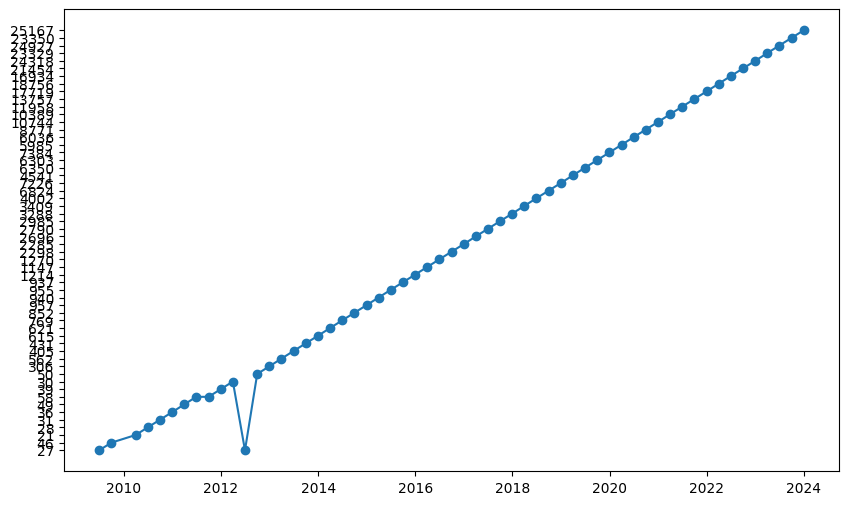

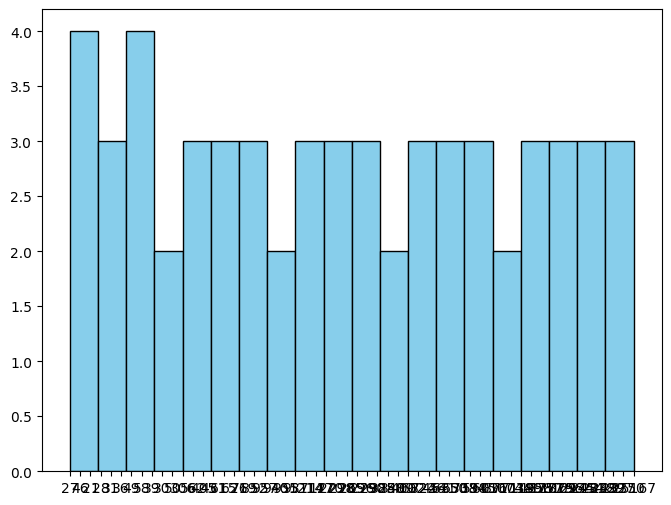

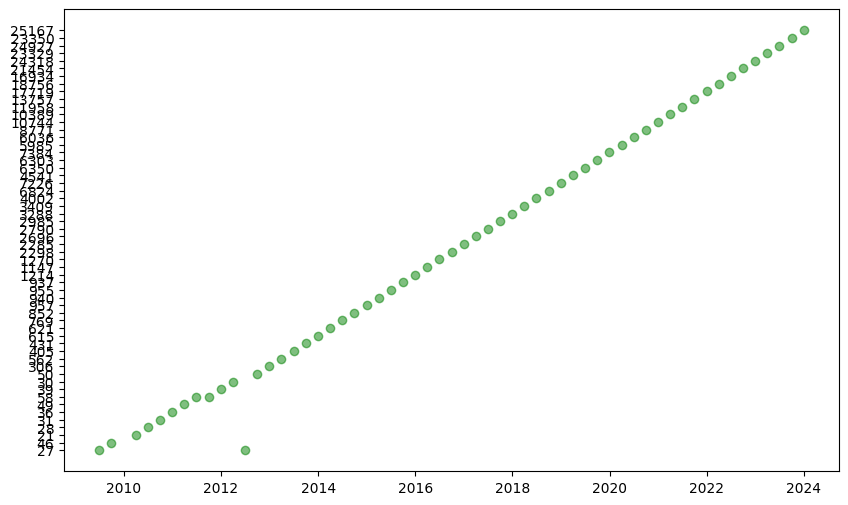

In [5]:
import matplotlib.pyplot as plt

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue = tesla_revenue.sort_values(by='date')

plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(tesla_revenue['Revenue'], bins=20, color='skyblue', edgecolor='black')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', alpha=0.5)
plt.show()